In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from datetime import datetime as dt
import platform

# 플랫폼별 한글 폰트 지정
if platform.system() == 'Windows':
#     print('Window')
    font_name = fm.FontProperties(fname = 'c:/Windows/Fonts/malgun.ttf').get_name()
    plt.rc('font', family = font_name)
    
else:
    plt.rc('font', family = 'AppleGothic', size = 8)
    
# 기상 자료 로딩
weather = pd.read_csv('daegu_utf8.csv', encoding = 'utf-8')
weather

,날짜,지점,평균기온,최저기온,최고기온
0,1909-01-01,143,-4.1,-8.0,0.1
1,1909-01-02,143,-0.8,-6.7,6.1
2,1909-01-03,143,1.0,-2.4,3.6
3,1909-01-04,143,4.2,0.0,9.2
4,1909-01-05,143,3.4,-0.4,9.0
...,...,...,...,...,...
41445,2022-06-26,143,28.4,24.4,32.8
41446,2022-06-27,143,27.3,25.4,30.1
41447,2022-06-28,143,28.9,24.8,32.3
41448,2022-06-29,143,29.5,27.7,33.7


In [2]:
weather.columns

Index(['날짜', '지점', '평균기온', '최저기온', '최고기온'], dtype='object')

In [3]:
# 날짜 column을 datetime 형식으로 변환
weather['날짜'] = pd.to_datetime(weather['날짜'])

In [4]:
# 자료와 시작, 마지막 연도, 지정 월을 입력받아 월별 평균 최고 최저 온도 계산한 dataFrame 반환 
def min_max_temp_mean(data, s_year, f_year, month):
    
    
    # 날짜를 월 까지만 표시 >> 그룹화 쉽게 하기위해
    data['dates'] = data['날짜'].dt.to_period('m')
    
    # 연도, 월 조건
    y_con = (data['dates'].dt.year >= s_year) * (data['dates'].dt.year <= f_year)
    m_con = data['dates'].dt.month == month
    
    # 조건에 맞는 자료에서 연-월으로 그룹화 >> 평균
    mean_data = data[y_con * m_con].groupby('dates').mean()[['최저기온', '최고기온']]
    
    # 최종 dataFrame 반환
    return(mean_data)



In [5]:
def draw_year_month_data(mean_data, s_year,f_year, month):
    # 출력
    print(f'\n{s_year} 년 부터 {f_year} 년 까지  {month} 월의 기온변화')
    print(f'{month} 월 최저기온 평균 : ')


    # series내의 자료가 ','로 구분되 출력되도록  
    for i in range(len(mean_data['최저기온'])):
        print('{:4.1f}'.format(mean_data['최저기온'][i]), end = '')
        if i == len(mean_data['최저기온']) -1:
            print('')
        elif i%12 == 11:
            print(', ')
        else :
            print(', ', end = '')
    print('')


    print(f'{month} 월 최고기온 평균 : ')

    # series내의 자료가 ','로 구분되 출력되도록  
    for i in range(len(mean_data['최고기온'])):
        print('{:4.1f}'.format(mean_data['최고기온'][i]), end = '')
        if i == len(mean_data['최고기온']) -1:
            print('')
        elif i%12 == 11:
            print(', ')
        else :
            print(', ', end = '')
    print('')



    # 시각화 - 꺽은선 그래프, 색/ 마커 지정
    plt.figure(figsize = (20,4))
    plt.plot(mean_data.index.year, mean_data['최고기온'], marker = 's', color = 'r', label = '최고기온')
    plt.plot(mean_data.index.year, mean_data['최저기온'], marker = 's', color = 'b', label = '최저기온')

    # 마이너스 기호 출력 깨짐 방지
    plt.rcParams['axes.unicode_minus'] = False

    # 그래프 제목, legend 설정
    plt.title(f"{s_year} 년 부터 {f_year} 년 까지 {month} 월의 기온 변화")
    plt.legend(loc = 2)
    plt.show()


시작 연도를 입력하세요: 2010
마지막 연도를 입력하세요: 2021
기온 변화를 측정할 달을 입력하세요: 12

2010 년 부터 2021 년 까지  12 월의 기온변화
12 월 최저기온 평균 : 
-2.5, -1.5, -3.9, -0.5, -2.8,  0.5, -0.6, -4.0, -2.3, -1.0, -3.1, -2.1

12 월 최고기온 평균 : 
 7.3,  6.9,  3.9,  8.1,  5.8,  9.0,  8.7,  5.8,  7.0,  9.0,  7.2,  8.9



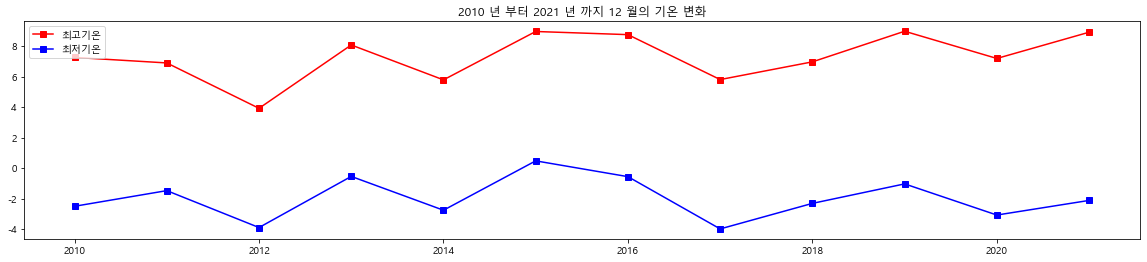

In [6]:
# 인자 입력
s_year = int(input('시작 연도를 입력하세요: '))
f_year = int(input('마지막 연도를 입력하세요: '))
month = int(input('기온 변화를 측정할 달을 입력하세요: '))

# 월별 데이터 생성
mean_data = min_max_temp_mean(weather, s_year,f_year, month)
draw_year_month_data(mean_data, s_year,f_year, month)


파이썬으로 하기

In [7]:
import csv
def mean_data_python(s_year, f_year, month):
    result = {'최고기온': {}, '최저기온': {}}
    with open('./daegu_utf8.csv',encoding = 'utf-8') as f:
        data= csv.reader(f)
        cols = next(data)
        for row in data:
            
            date = pd.to_datetime(row[0])
            
            # 연도, 월 조건
            y_con = (date.year >= s_year) * (date.year <= f_year)
            m_con = date.month == month
            
            if y_con * m_con :
                if date.year in result['최저기온'].keys():
                    result['최고기온'][date.year].append(float(row[-1]))
                    result['최저기온'][date.year].append(float(row[-2]))
                else:
                    result['최고기온'][date.year] = [float(row[-1])]
                    result['최저기온'][date.year] = [float(row[-2])]
                    
    years = []
    max_means = []
    min_means = []
    for k, v in result['최고기온'].items() :
        years.append(k)
        max_means.append(np.mean(v))

    for k, v in result['최저기온'].items() :
        min_means.append(np.mean(v))
        
        
    return years, max_means, min_means

In [8]:
def draw_python(years, max_means, min_means, s_year,f_year, month):
    # 출력
    print(f'\n{s_year} 년 부터 {f_year} 년 까지  {month} 월의 기온변화')
    print(f'{month} 월 최저기온 평균 : ')

    # series내의 자료가 ','로 구분되 출력되도록  
    for i in range(len(min_means)):
        print('{:4.1f}'.format(min_means[i]), end = '')
        if i == len(min_means) -1:
            print('')
        elif i%12 == 11:
            print(', ')
        else :
            print(', ', end = '')
    print('')


    print(f'{month} 월 최고기온 평균 : ')

    # series내의 자료가 ','로 구분되 출력되도록  
    for i in range(len(max_means)):
        print('{:4.1f}'.format(max_means[i]), end = '')
        if i == len(max_means) -1:
            print('')
        elif i%12 == 11:
            print(', ')
        else :
            print(', ', end = '')
    print('')



    # 시각화 - 꺽은선 그래프, 색/ 마커 지정
    plt.figure(figsize = (20,4))
    plt.plot(years, max_means, marker = 's', color = 'r', label = '최고기온')
    plt.plot(years, min_means, marker = 's', color = 'b', label = '최저기온')

    # 마이너스 기호 출력 깨짐 방지
    plt.rcParams['axes.unicode_minus'] = False

    # 그래프 제목, legend 설정
    plt.title(f"{s_year} 년 부터 {f_year} 년 까지 {month} 월의 기온 변화")
    plt.legend(loc = 2)
    plt.show()


시작 연도를 입력하세요: 2010
마지막 연도를 입력하세요: 2021
기온 변화를 측정할 달을 입력하세요: 12

2010 년 부터 2021 년 까지  12 월의 기온변화
12 월 최저기온 평균 : 
-2.5, -1.5, -3.9, -0.5, -2.8,  0.5, -0.6, -4.0, -2.3, -1.0, -3.1, -2.1

12 월 최고기온 평균 : 
 7.3,  6.9,  3.9,  8.1,  5.8,  9.0,  8.7,  5.8,  7.0,  9.0,  7.2,  8.9



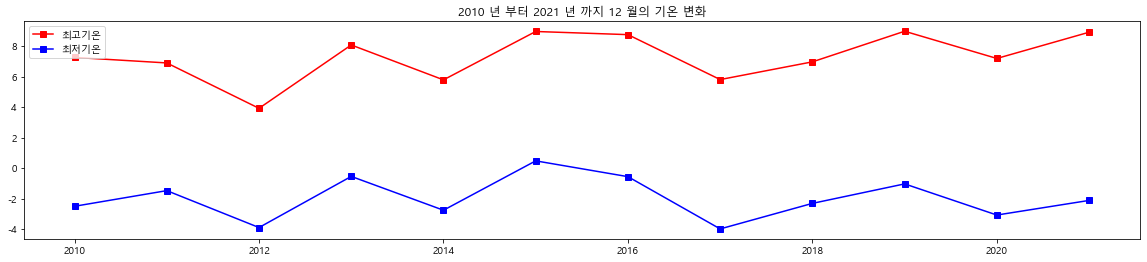

In [9]:
s_year = int(input('시작 연도를 입력하세요: '))
f_year = int(input('마지막 연도를 입력하세요: '))
month = int(input('기온 변화를 측정할 달을 입력하세요: '))

years, max_means, min_means = mean_data_python(s_year, f_year, month)
draw_python(years, max_means, min_means, s_year,f_year, month)